### ***Customer Chun Prediction At Vodafone Corporation***

###  **Business Understanding** 
### *Problem Statement*:



In a highly competitive market, businesses strive to retain their existing customers while continuously acquiring new ones. Customer churn, the phenomenon where customers stop doing business with a company, poses a significant threat to revenue and growth. Understanding and predicting customer churn can enable businesses to implement proactive measures to improve customer retention, thereby enhancing profitability and long-term customer loyalty.



### *Business Objectives*


- Predict Customer Churn: Develop machine learning models to accurately predict the likelihood of a customer leaving Vodafone.
- Identify Key Indicators: Determine the primary factors that contribute to customer churn.
- Develop Retention Strategies: Formulate effective strategies to retain customers based on the insights gained from the churn prediction models.


### *Stakeholders*
- Azubi Africa
- Azubi Learners
- Azubi CTA

### *Business Questons*
- what is the proportion of cusotmers who have churned to those who have not 
- Are senior citizens more likely to churn compared to younger customers?
- How do churn rates vary between customers using DSL, Fiber Optic, or no internet service?
- Is there a relationship between the total amount charged to a customer and their likelihood of churning?
-  How does the length of time a customer has been with the company (tenure) impact their likelihood of churning? Are newer customers more likely to churn than long-term customers?

### *Hypothesis Statement*

- Null Hypothesis (Ho):There is a no significant relationship between the total amount charged to a customer and their likelihood of churning.
 - Alternative Hypothesis (H1):- There is a significant relationship between the total amount charged to a customer and their likelihood of churning.

### *Business Successs Criteria*

- Accuracy: The model should achieve an overall accuracy of at least 85%. This ensures that the majority of predictions (both churn and non-churn) are correct.
- Precision and Recall: The model should maintain a precision and recall of at least 80%. High precision ensures that when the model predicts churn, it is usually correct. High recall ensures that the model identifies most of the actual churn cases.
- F1-Score: The F1-Score, which balances precision and recall, should be at least 0.80. This is crucial for ensuring that the model performs well in identifying churners without being biased towards either false positives or false negatives.
- AUC-ROC: The Area Under the Receiver Operating Characteristic Curve (AUC-ROC) should be at least 0.85. A high AUC-ROC value indicates a good ability to distinguish between churners and non-churners.

### **Data Understanding**
The data for this project are  in three different locations.The first two dataset will be used for training and evaluation of the models while the last dataset will be used for testing. The following describes the columns present in the data.

- Gender -- Whether the customer is a male or a female

- SeniorCitizen -- Whether a customer is a senior citizen or not

- Partner -- Whether the customer has a partner or not (Yes, No)

- Dependents -- Whether the customer has dependents or not (Yes, No)

- Tenure -- Number of months the customer has stayed with the company

- Phone Service -- Whether the customer has a phone service or not (Yes, No)

- MultipleLines -- Whether the customer has multiple lines or not

- InternetService -- Customer's internet service provider (DSL, Fiber Optic, No)

- OnlineSecurity -- Whether the customer has online security or not (Yes, No, No Internet)

- OnlineBackup -- Whether the customer has online backup or not (Yes, No, No Internet)

- DeviceProtection -- Whether the customer has device protection or not (Yes, No, No internet service)

- TechSupport -- Whether the customer has tech support or not (Yes, No, No internet)

- StreamingTV -- Whether the customer has streaming TV or not (Yes, No, No internet service)

- StreamingMovies -- Whether the customer has streaming movies or not (Yes, No, No Internet service)

- Contract -- The contract term of the customer (Month-to-Month, One year, Two year)

- PaperlessBilling -- Whether the customer has paperless billing or not (Yes, No)

- Payment Method -- The customer's payment method (Electronic check, mailed check, Bank transfer(automatic), Credit card(automatic))

- MonthlyCharges -- The amount charged to the customer monthly

- TotalCharges -- The total amount charged to the customer

- Churn -- Whether the customer churned or not (Yes or No)



##### *Install all necessary libraries* 

In [98]:
%pip install scikit-learn


Note: you may need to restart the kernel to use updated packages.


*Import  neccessary libraries for the project*

In [99]:
#data manipulation libraries
import pandas as pd
import numpy as np 

#data visualization libraries 
import matplotlib.pyplot as plt
import seaborn as sns 
import missingno as msno

#statistics libraries 
from scipy import stats
import statistics as stat
from scipy.stats import chi2_contingency,mannwhitneyu


#database connection
import pyodbc
from dotenv import dotenv_values

#machine learning libraries 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix



# hide warning
import warnings
warnings.filterwarnings('ignore')



*setup a databse connection*

In [100]:
# load environment variable from .env file
environment_variables =dotenv_values('.env')
# Get the values for the credentials you set in the '.env' file
server = environment_variables.get("SERVER")
database = environment_variables.get("DATABASE")
username = environment_variables.get("UID")
password = environment_variables.get("PWD")

# Create a connection string
connection_string = f"DRIVER={{SQL Server}};SERVER={server};DATABASE={database};UID={username};PWD={password};MARS_Connection=yes;MinProtocolVersion=TLSv1.2;"
 
connection = pyodbc.connect(connection_string)

*load the first dataset from a SQL server*

In [101]:
# display all column of the dataset
pd.set_option('display.max_columns', None)
# loading the first 3000 records from SQL Server
query="SELECT * FROM dbo.LP2_Telco_churn_first_3000"
data1=pd.read_sql(query, connection)
data1.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,False,True,False,1,False,None,DSL,False,True,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.850000,False
1,5575-GNVDE,Male,False,False,False,34,True,False,DSL,True,False,True,False,False,False,One year,False,Mailed check,56.950001,1889.500000,False
2,3668-QPYBK,Male,False,False,False,2,True,False,DSL,True,True,False,False,False,False,Month-to-month,True,Mailed check,53.849998,108.150002,True
3,7795-CFOCW,Male,False,False,False,45,False,None,DSL,True,False,True,True,False,False,One year,False,Bank transfer (automatic),42.299999,1840.750000,False
4,9237-HQITU,Female,False,False,False,2,True,False,Fiber optic,False,False,False,False,False,False,Month-to-month,True,Electronic check,70.699997,151.649994,True


*check for data quality*

In [102]:
data1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        3000 non-null   object 
 1   gender            3000 non-null   object 
 2   SeniorCitizen     3000 non-null   bool   
 3   Partner           3000 non-null   bool   
 4   Dependents        3000 non-null   bool   
 5   tenure            3000 non-null   int64  
 6   PhoneService      3000 non-null   bool   
 7   MultipleLines     2731 non-null   object 
 8   InternetService   3000 non-null   object 
 9   OnlineSecurity    2349 non-null   object 
 10  OnlineBackup      2349 non-null   object 
 11  DeviceProtection  2349 non-null   object 
 12  TechSupport       2349 non-null   object 
 13  StreamingTV       2349 non-null   object 
 14  StreamingMovies   2349 non-null   object 
 15  Contract          3000 non-null   object 
 16  PaperlessBilling  3000 non-null   bool   


In [103]:
# check the number of missing values from each column
data1.isnull().sum()

customerID            0
gender                0
SeniorCitizen         0
Partner               0
Dependents            0
tenure                0
PhoneService          0
MultipleLines       269
InternetService       0
OnlineSecurity      651
OnlineBackup        651
DeviceProtection    651
TechSupport         651
StreamingTV         651
StreamingMovies     651
Contract              0
PaperlessBilling      0
PaymentMethod         0
MonthlyCharges        0
TotalCharges          5
Churn                 1
dtype: int64

In [104]:
# checking for duplicates in the dataset
data1.duplicated().sum()

0

*Load the second dataset*

In [105]:
# display all column of thr dataset
pd.set_option('display.max_columns', None)
# load the dataset
data2 = pd.read_csv('C:/Users/BALKIS/OneDrive - Azubi Africa/my azubi africa career accelerator projects/CUSTOMER-CHUN-PREDICTION-AT-VODAFONE-CORPORATION/data/LP2_Telco-churn-second-2000.csv')
data2.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5600-PDUJF,Male,0,No,No,6,Yes,No,DSL,No,No,No,Yes,No,No,Month-to-month,Yes,Credit card (automatic),49.50,312.7,No
1,8292-TYSPY,Male,0,No,No,19,Yes,No,DSL,No,No,Yes,Yes,No,No,Month-to-month,Yes,Credit card (automatic),55.00,1046.5,Yes
2,0567-XRHCU,Female,0,Yes,Yes,69,No,No phone service,DSL,Yes,No,Yes,No,No,Yes,Two year,Yes,Credit card (automatic),43.95,2960.1,No
3,1867-BDVFH,Male,0,Yes,Yes,11,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,74.35,834.2,Yes
4,2067-QYTCF,Female,0,Yes,No,64,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,111.15,6953.4,No


*check for data quality*

In [106]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2043 entries, 0 to 2042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        2043 non-null   object 
 1   gender            2043 non-null   object 
 2   SeniorCitizen     2043 non-null   int64  
 3   Partner           2043 non-null   object 
 4   Dependents        2043 non-null   object 
 5   tenure            2043 non-null   int64  
 6   PhoneService      2043 non-null   object 
 7   MultipleLines     2043 non-null   object 
 8   InternetService   2043 non-null   object 
 9   OnlineSecurity    2043 non-null   object 
 10  OnlineBackup      2043 non-null   object 
 11  DeviceProtection  2043 non-null   object 
 12  TechSupport       2043 non-null   object 
 13  StreamingTV       2043 non-null   object 
 14  StreamingMovies   2043 non-null   object 
 15  Contract          2043 non-null   object 
 16  PaperlessBilling  2043 non-null   object 


In [107]:
# check for missing values
data2.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [108]:
# check for duplicates in the data
data2.duplicated().sum()

0

### *Merge the two dataset*

In [109]:
main_df = pd.concat([data1,data2],axis=0)
main_df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,True,False,1,False,None,DSL,False,True,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.85,False
1,5575-GNVDE,Male,0,False,False,34,True,False,DSL,True,False,True,False,False,False,One year,False,Mailed check,56.950001,1889.5,False
2,3668-QPYBK,Male,0,False,False,2,True,False,DSL,True,True,False,False,False,False,Month-to-month,True,Mailed check,53.849998,108.150002,True
3,7795-CFOCW,Male,0,False,False,45,False,None,DSL,True,False,True,True,False,False,One year,False,Bank transfer (automatic),42.299999,1840.75,False
4,9237-HQITU,Female,0,False,False,2,True,False,Fiber optic,False,False,False,False,False,False,Month-to-month,True,Electronic check,70.699997,151.649994,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.800000,1990.5,No
2039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.200000,7362.9,No
2040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.600000,346.45,No
2041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.400000,306.6,Yes


### *Data Quality Assessment*

*Exploratory Data Analysis*

In [110]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5043 entries, 0 to 2042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5043 non-null   object 
 1   gender            5043 non-null   object 
 2   SeniorCitizen     5043 non-null   int64  
 3   Partner           5043 non-null   object 
 4   Dependents        5043 non-null   object 
 5   tenure            5043 non-null   int64  
 6   PhoneService      5043 non-null   object 
 7   MultipleLines     4774 non-null   object 
 8   InternetService   5043 non-null   object 
 9   OnlineSecurity    4392 non-null   object 
 10  OnlineBackup      4392 non-null   object 
 11  DeviceProtection  4392 non-null   object 
 12  TechSupport       4392 non-null   object 
 13  StreamingTV       4392 non-null   object 
 14  StreamingMovies   4392 non-null   object 
 15  Contract          5043 non-null   object 
 16  PaperlessBilling  5043 non-null   object 
 17  

In [111]:
# check for missing values
main_df.isnull().sum()

customerID            0
gender                0
SeniorCitizen         0
Partner               0
Dependents            0
tenure                0
PhoneService          0
MultipleLines       269
InternetService       0
OnlineSecurity      651
OnlineBackup        651
DeviceProtection    651
TechSupport         651
StreamingTV         651
StreamingMovies     651
Contract              0
PaperlessBilling      0
PaymentMethod         0
MonthlyCharges        0
TotalCharges          5
Churn                 1
dtype: int64

*check for duplicates in the data*

In [112]:
main_df.duplicated().sum()

0

In [113]:
# convert the totalcharge column to numerical datatype
main_df['TotalCharges'] =pd.to_numeric(main_df['TotalCharges'],errors='coerce')

In [114]:
main_df.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,5043.0,0.162403,0.368857,0.000000,0.000000,0.000000,0.000000,1.000000
tenure,5043.0,32.576641,24.529807,0.000000,9.000000,29.000000,56.000000,72.000000
MonthlyCharges,5043.0,65.090214,30.068133,18.400000,35.775000,70.550003,90.050003,118.650002
TotalCharges,5035.0,2302.062861,2269.483576,18.799999,417.675003,1401.150024,3862.000000,8670.100000


In [115]:
main_df.describe(include ='object').T

,count,unique,top,freq
customerID,5043,5043,7590-VHVEG,1
gender,5043,2,Male,2559
Partner,5043,4,False,1538
Dependents,5043,4,False,2070
PhoneService,5043,4,True,2731
MultipleLines,4774,5,False,1437
InternetService,5043,3,Fiber optic,2248
OnlineSecurity,4392,5,False,1478
OnlineBackup,4392,5,False,1320
DeviceProtection,4392,5,False,1296


#### *Key Insights*

- There are 21 columns in the dataset with 5043 rows 
- There are 269 missing value in the "multiplelines"column,5 missing values in 'Totalcharges'column and 1 in the 'churn' column.
- 651 values are missing in the "OnlineSecurity","OnlineBackup","DeviceProtection","TechSupport","StreamingTV","StreamingMovies" columns respectively
- The Totalcharges column is in the string format instead of float
- The data is not normally distributed
- There are no duplicate in the data

*check for unique values in each columns*

In [116]:
# print out columns
columns =main_df.columns
columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [117]:
#checking for unique values
for column in columns:
    print(f"{column}")
    print(f"There are {main_df[column].nunique()} unique values")
    print(f'{main_df[column].unique()}')
    print('-' * 50)

customerID
There are 5043 unique values
['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
--------------------------------------------------
gender
There are 2 unique values
['Female' 'Male']
--------------------------------------------------
SeniorCitizen
There are 2 unique values
[0 1]
--------------------------------------------------
Partner
There are 4 unique values
[True False 'No' 'Yes']
--------------------------------------------------
Dependents
There are 4 unique values
[False True 'No' 'Yes']
--------------------------------------------------
tenure
There are 73 unique values
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
--------------------------------------------------
PhoneService
There are 4 unique values
[False True 'Yes' 'No']
--------------------------------

#### *Data Cleaning*

In [118]:
#define a dictionary to map boolean and None values to a meaningful categories
mapping_new_cat_values = {
    'Partner':{True:'Yes', False:'No', 'No':'No', 'Yes':'Yes',},
    'Dependents':{True:'Yes', False:'No', 'No':'No', 'Yes':'Yes'},
    'PhoneService':{True:'Yes', False:'No', 'No':'No', 'Yes':'Yes'},
    'MultipleLines':{ False:'No', True:'Yes', 'No':'No', 'No phone service':'No phone service' , 'Yes':'Yes'},
    'OnlineSecurity':{False:'No', True:'Yes', 'No':'No', 'Yes':'Yes', 'No internet service':'No internet service' },
    'OnlineBackup':{False:'No', True:'Yes', 'No':'No', 'Yes':'Yes', 'No internet service':'No internet service'},
    'DeviceProtection':{False:'No', True:'Yes', 'No':'No', 'Yes':'Yes', 'No internet service':'No internet service'},
    'TechSupport':{False:'No', True:'Yes', 'No':'No', 'Yes':'Yes', 'No internet service':'No internet service'},
    'StreamingTV':{False:'No', True:'Yes', 'No':'No', 'Yes':'Yes', 'No internet service':'No internet service'},
    'StreamingMovies':{False:'No', True:'Yes', 'No':'No', 'Yes':'Yes', 'No internet service':'No internet service'},
    'PaperlessBilling':{True:'Yes', False:'No', 'No':'No', 'Yes':'Yes'},
    'Churn':{True:'Yes', False:'No', 'No':'No', 'Yes':'Yes'},
    'SeniorCitizen':{0:'No',1:'Yes'}
    }
    # convert the columns to category_column
for col in mapping_new_cat_values.keys():
    main_df[col] = main_df[col].astype('category')
# map the boolean and None values to meaningful categories  

main_df.replace(mapping_new_cat_values, inplace=True)
main_df.head(20)

# check for missing values          

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,NaN,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.850000,29.850000,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.950001,1889.500000,No
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.849998,108.150002,Yes
3,7795-CFOCW,Male,No,No,No,45,No,NaN,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.299999,1840.750000,No
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.699997,151.649994,Yes
5,9305-CDSKC,Female,No,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.650002,820.500000,Yes
6,1452-KIOVK,Male,No,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.099998,1949.400024,No
7,6713-OKOMC,Female,No,No,No,10,No,NaN,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.750000,301.899994,No
8,7892-POOKP,Female,No,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.800003,3046.050049,Yes
9,6388-TABGU,Male,No,No,Yes,62,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.150002,3487.949951,No


In [119]:
churn_value_counts = main_df['Churn'].value_counts()
print("Churn Value Counts:", churn_value_counts)

Churn Value Counts: Churn
No     3706
Yes    1336
Name: count, dtype: int64


### *Univariate Analysis*

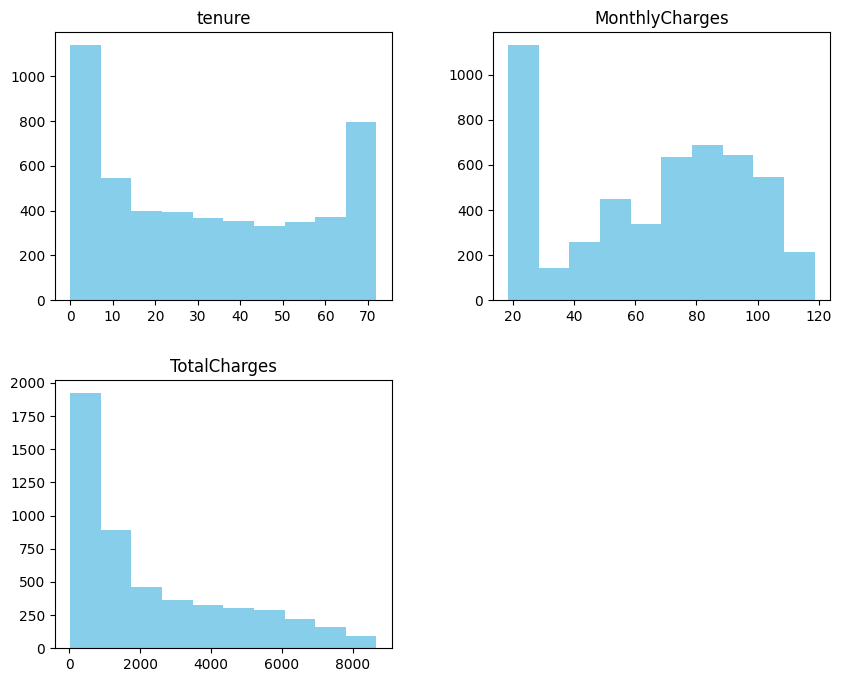

In [120]:
# visualizing the distribution of the numeric columns
main_df.hist(figsize=(10,8),grid=False,color='skyblue')
plt.show()

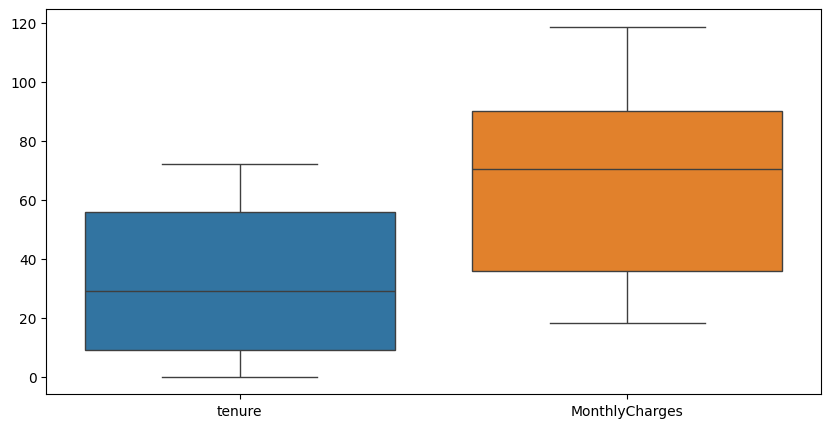

In [121]:
plt.figure(figsize=(10,5))
sns.boxplot(main_df.drop(['TotalCharges'],axis=1))
plt.show()

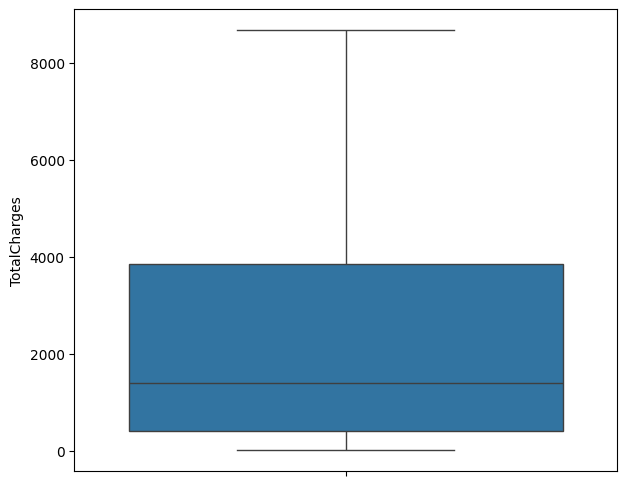

In [122]:
plt.figure(figsize=(7,6))
sns.boxplot(main_df['TotalCharges'])
plt.show()

#### *Tenure*
- There is a high frequency of customers with very low tenure (near 0 months), indicating many new or short-term customers.
- There's another spike at the maximum tenure value (around 70 months), suggesting a significant number of long-term customers.
- This distribution suggests that customers tend to either leave early or stay for a long time, with fewer customers having mid-range tenure.

#### MonthlyCharges
- There is a high concentration of customers with low monthly charges (around $20-$30).
- As the charges increase, the number of customers initially drops but then increases and peaks again around $70-$90 before declining.
- This indicates two main groups of customers: those paying low monthly charges and those paying moderate to high monthly charges.


#### *TotalCharges*

- The majority of customers have low total charges, which aligns with many customers having short tenures.
- The number of customers decreases steadily as total charges increase, showing a right-skewed distribution.
- There are very few customers with extremely high total charges
- The total charges are largely driven by tenure, with newer customers having lower total charges and long-term customers accumulating higher charges over time.


Churn Value Counts: Churn
No     3706
Yes    1336
Name: count, dtype: int64
Churn Rate: 26.492167360697998


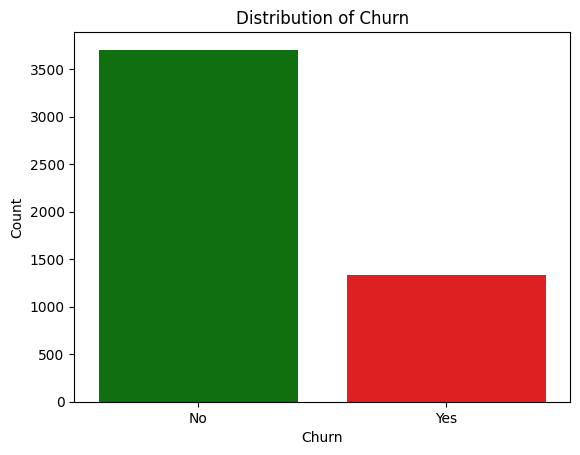

In [123]:
# calculate number of customers who have churned and who have not
churn_value_counts = main_df['Churn'].value_counts()
print("Churn Value Counts:", churn_value_counts)
# Calculate the total number of customers
total_customers = len(main_df)

# Calculate the number of customers who churned
churned_customers = len(main_df.loc[main_df['Churn'] == 'Yes'])

# Calculate the churn rate
churn_rate = (churned_customers / total_customers) * 100

print("Churn Rate:", churn_rate)
# reset index
#main_df.reset_index()
# distribution of churn
main_df.reset_index(inplace=True)
sns.countplot(x='Churn',data=main_df,color='blue', palette={'Yes': 'red', 'No': 'green'})
plt.title('Distribution of Churn')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()

The green bar represents customers who have not churned while the red bar represents customers who have churned.

#### Non-Churned Customers:
There are  3,706 customers who have not churned.
This is the majority group, indicating that most customers remain with the company.
#### Churned Customers:
There are 1,336 customers who have churned which indicates a churn rate of 26.5%.
This is a significant minority, showing that a considerable number of customers has left the company.

## *Bi-variate Analysis*

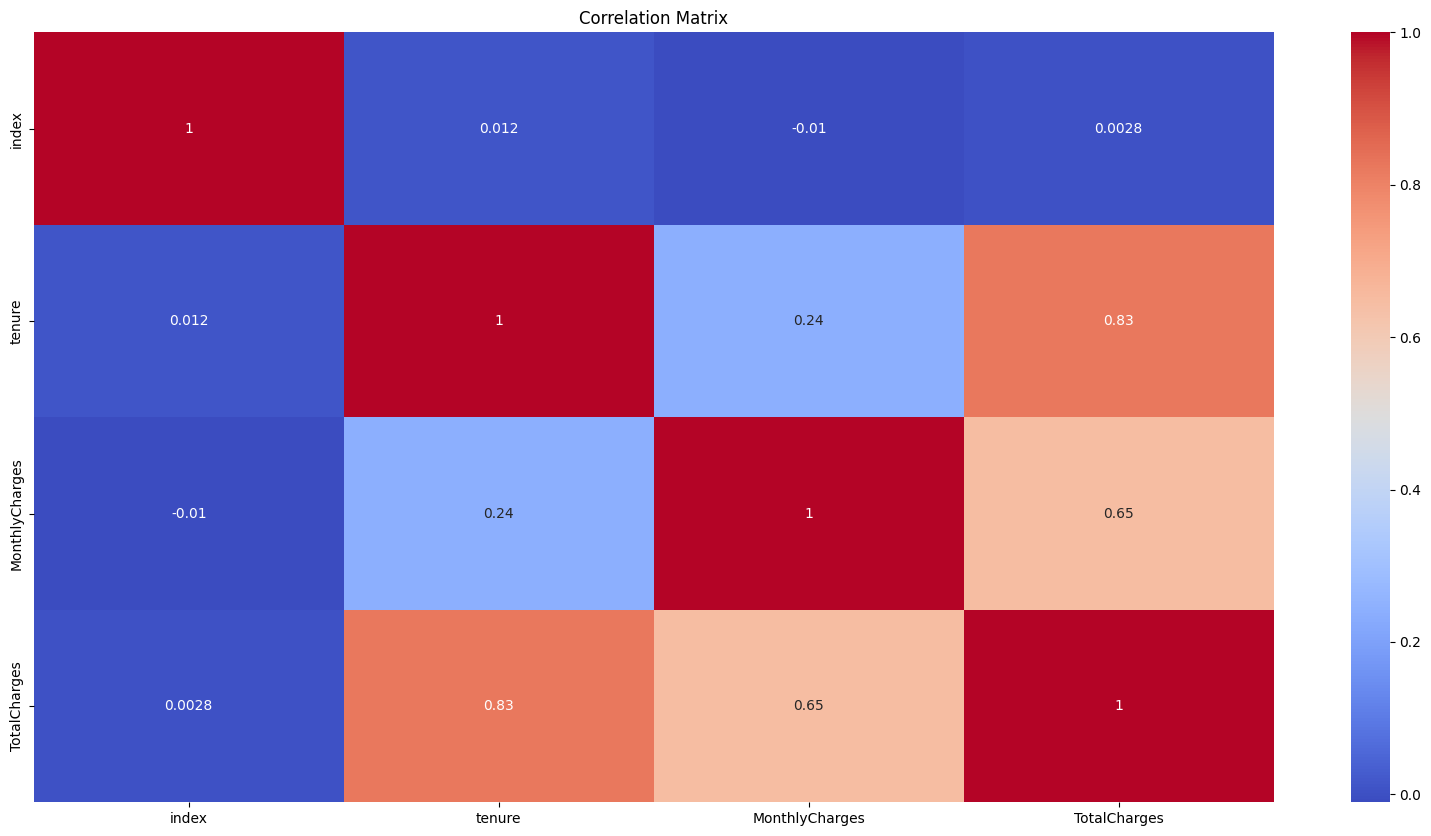

In [124]:
# check for the relationship between each pair of varibales using correlation matrix
numeric_df = main_df.select_dtypes(include=[np.number])
corr_matrix = numeric_df.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()  



The above correlation matrix explains the strength of the relationship between the following columns;
TotalCharges,Monthlycharges,tenure
- there is a strong positive correlation between the tenure and totalcharges made by the customer i.e the longer the customer stays with the company the higher the totalcharges made.
- Also the higher the monthly charges the higher the total charges made by the customers this also suggest apositive correlation.

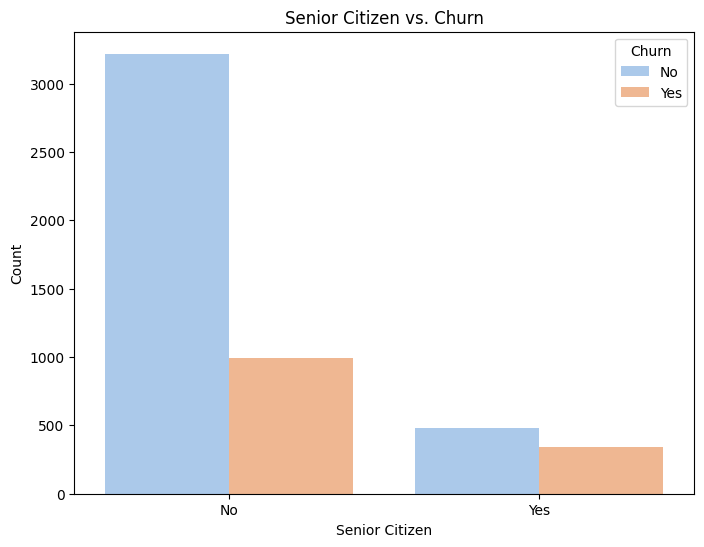

In [131]:
# Plotting the stacked bar chart
plt.figure(figsize=(8, 6))
sns.countplot(x='SeniorCitizen', hue='Churn', data=main_df, palette='pastel')
plt.title('Senior Citizen vs. Churn')
plt.xlabel('Senior Citizen')
plt.ylabel('Count')
plt.legend(title='Churn', loc='upper right')
plt.show()



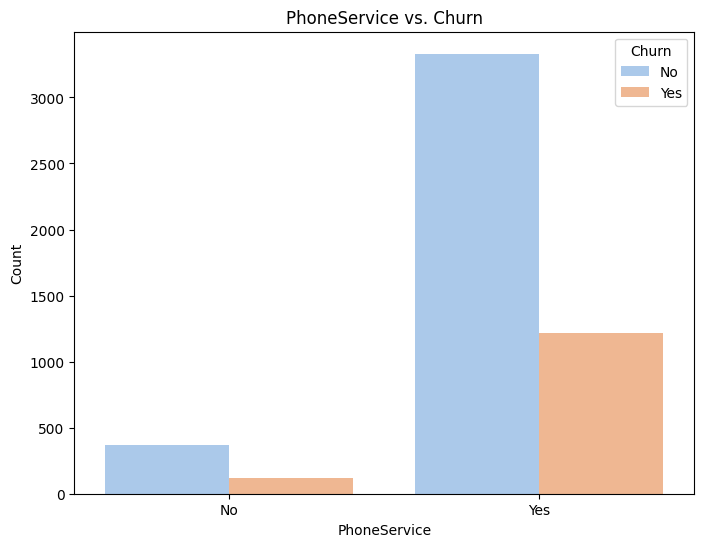

In [135]:
# Plotting the stacked bar chart
plt.figure(figsize=(8, 6))
sns.countplot(x='PhoneService', hue='Churn', data=main_df, palette='pastel')
plt.title('PhoneService vs. Churn')
plt.xlabel('PhoneService')
plt.ylabel('Count')
plt.legend(title='Churn', loc='upper right')
plt.show()

the above chi-square statistics  and p-value show that there is no significant relationship between a customer having a phone service and churning. that is, whether a customer has a phone service or not does not affect the churning rate

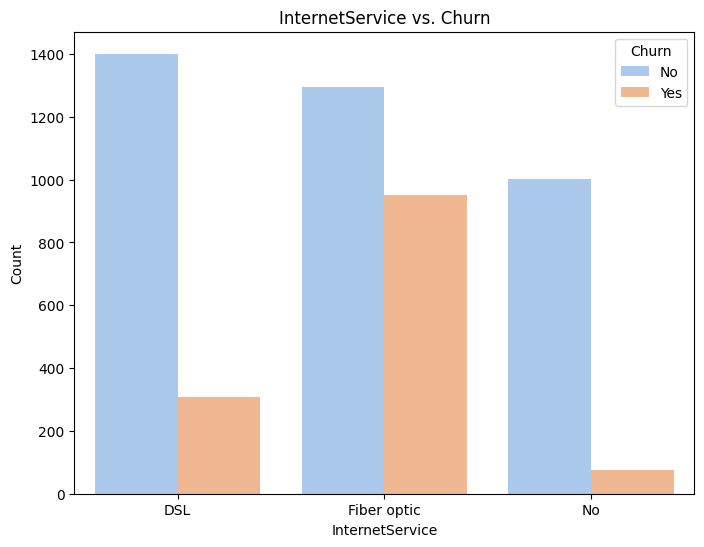

In [136]:
# Plotting the stacked bar chart
plt.figure(figsize=(8, 6))
sns.countplot(x='InternetService', hue='Churn', data=main_df, palette='pastel')
plt.title('InternetService vs. Churn')
plt.xlabel('InternetService')
plt.ylabel('Count')
plt.legend(title='Churn', loc='upper right')
plt.show()

- Chi-square statistic: the large value of the chi-square statistics indicates a strong association between InternetService and Churn.
- P-value: Confirms that this association is statistically significant because its lower than the reasonable significant level such as 0.05.
- The interpretation suggests that InternetService is an important factor influencing customer churn behavior.
- from the above visualization we can observe that customers using fiberoptics has a higher churn rate compared to those with DSL and those without internet service.

### *Hypothesis Testing*

 - Null Hypothesis (Ho):There is a no significant relationship between the total amount charged to a customer and their likelihood of churning.
 - Alternative Hypothesis (H1):- There is a significant relationship between the total amount charged to a customer and their likelihood of churning.

we will carryout a non-parametric test because our data is not normally distributed. therefore we will test the hypothesis with mannwitneyu test

In [128]:
# drop missing values from the totalcharges column
main_df.dropna(subset=['TotalCharges'], inplace=True)
# Separate data into churned and non-churned groups
churn_yes = main_df[main_df['Churn'] == 'Yes']['TotalCharges']
churn_no = main_df[main_df['Churn'] == 'No']['TotalCharges']

# Perform Mann-Whitney U test
U_statistic, p_value = mannwhitneyu(churn_yes, churn_no,)

print(f"Mann-Whitney U statistic: {U_statistic}")
print(f"P-value: {p_value}")

# Interpret the results
alpha = 0.05  # Significance level

if p_value < alpha:
    print("Reject the null hypothesis. There is a significant relationship between totalcharges and Churn.")
else:
    print("Fail to reject the null hypothesis. There is no significant relationship between totalcharges and Churn.")

Mann-Whitney U statistic: 1735257.0
P-value: 1.2635460045211262e-58
Reject the null hypothesis. There is a significant relationship between totalcharges and Churn.


### **Answering the Business Questions*

- what is the proportion of cusotmers who have churned to those who have not 


Churn Value Counts: Churn
No     3698
Yes    1336
Name: count, dtype: int64
Churn Rate: 26.53426017874876


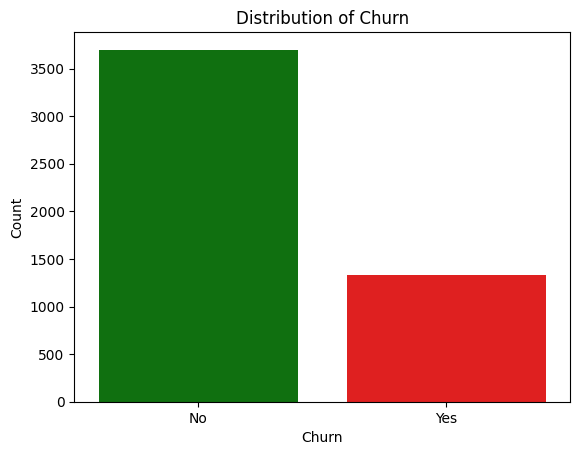

In [129]:
# calculate number of customers who have churned and who have not
churn_value_counts = main_df['Churn'].value_counts()
print("Churn Value Counts:", churn_value_counts)
# Calculate the total number of customers
total_customers = len(main_df)

# Calculate the number of customers who churned
churned_customers = len(main_df.loc[main_df['Churn'] == 'Yes'])

# Calculate the churn rate
churn_rate = (churned_customers / total_customers) * 100

print("Churn Rate:", churn_rate)
# reset index
#main_df.reset_index()
# distribution of churn
sns.countplot(x='Churn',data=main_df,color='blue', palette={'Yes':'red', 'No': 'green'})
plt.title('Distribution of Churn')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()

- Are senior citizens more likely to churn compared to younger customers?


<Figure size 800x600 with 0 Axes>

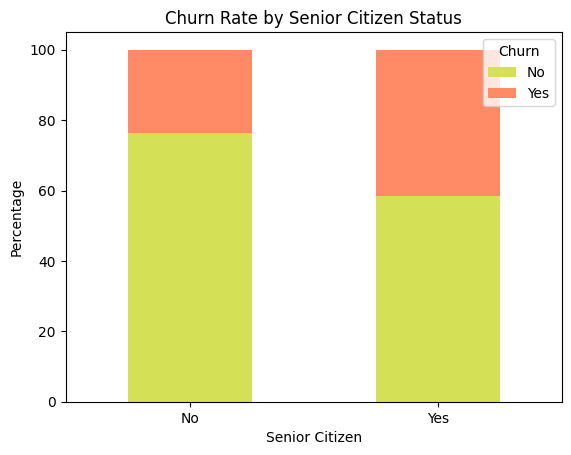

In [134]:
churn_rates = main_df.groupby('SeniorCitizen')['Churn'].value_counts(normalize=True).unstack() * 100
# Plot the churn rates
plt.figure(figsize=(8, 6))
churn_rates.plot(kind='bar', stacked=True, color=['#d4e157', '#ff8a65'])
plt.title('Churn Rate by Senior Citizen Status')
plt.xlabel('Senior Citizen')
plt.ylabel('Percentage')
plt.legend(title='Churn', loc='upper right')
plt.xticks(rotation=0)
plt.show()


- How do churn rates vary between customers using DSL, Fiber Optic, or no internet service?


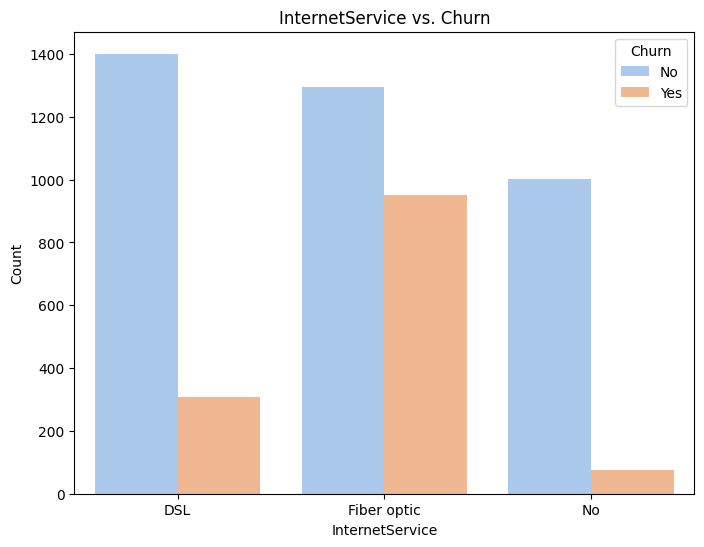

In [132]:
plt.figure(figsize=(8, 6))
sns.countplot(x='InternetService', hue='Churn', data=main_df, palette='pastel')
plt.title('InternetService vs. Churn')
plt.xlabel('InternetService')
plt.ylabel('Count')
plt.legend(title='Churn', loc='upper right')
plt.show()


- Is there a relationship between the total amount charged to a customer and their likelihood of churning?


-  How does the length of time a customer has been with the company (tenure) impact their likelihood of churning? Are newer customers more likely to churn than long-term customers?